In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

Text(27.0, 5751.969230769231, 'prediction')

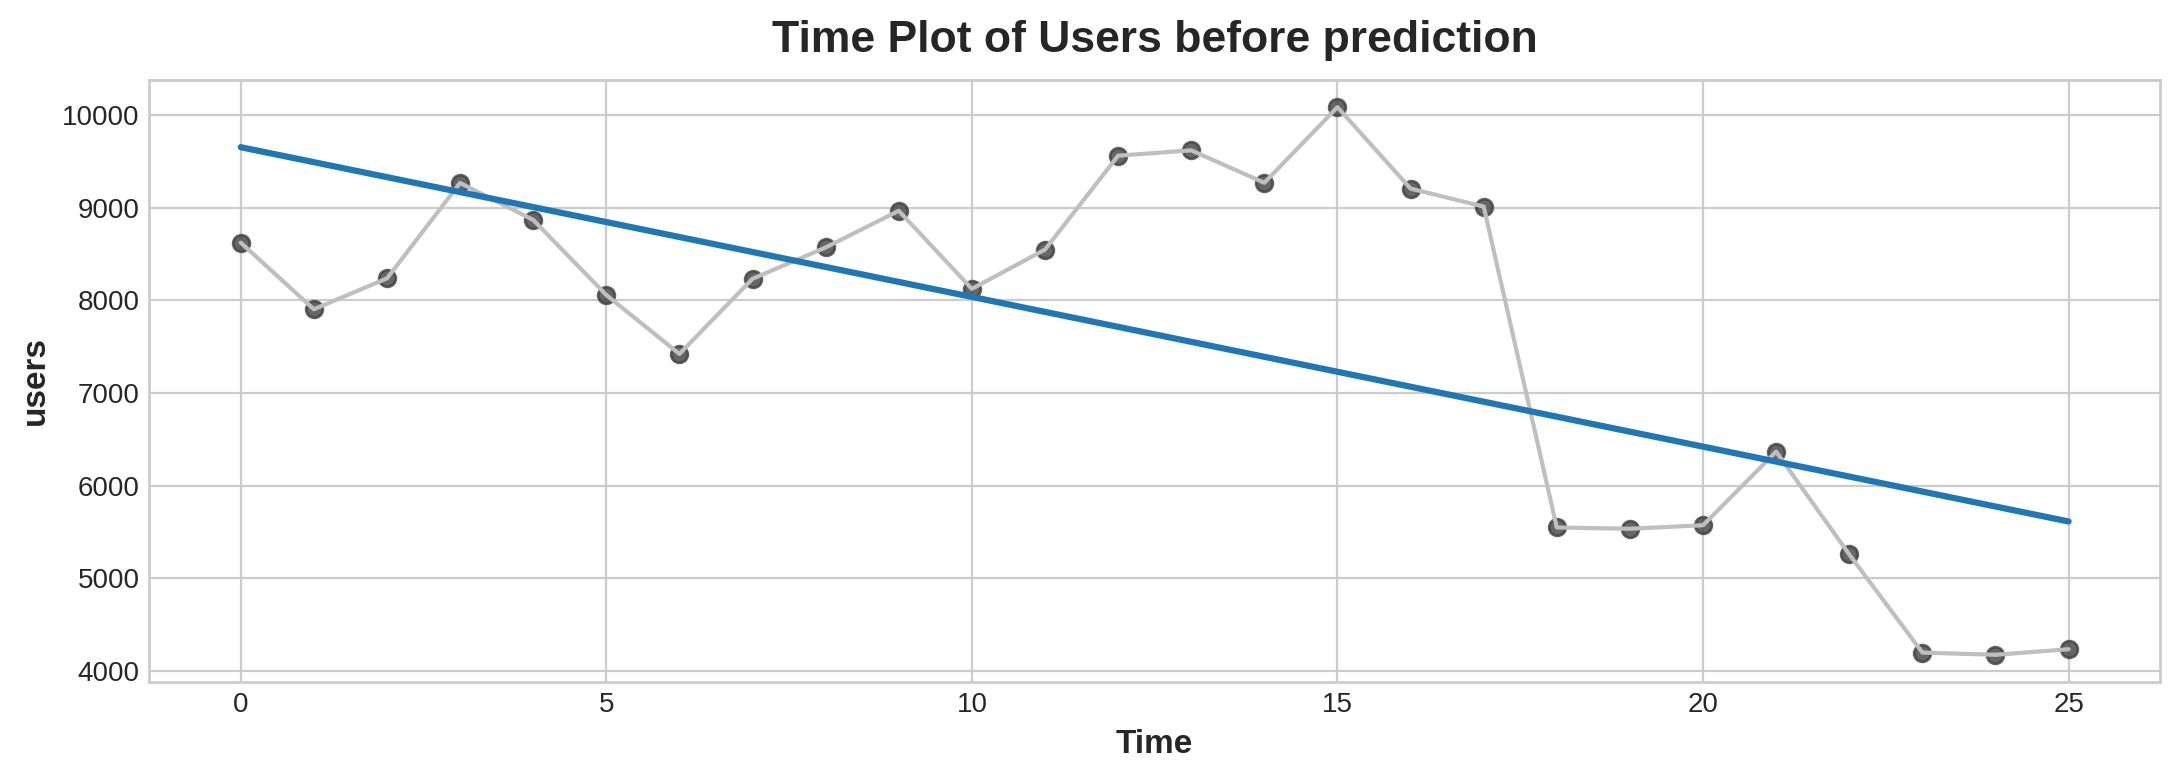

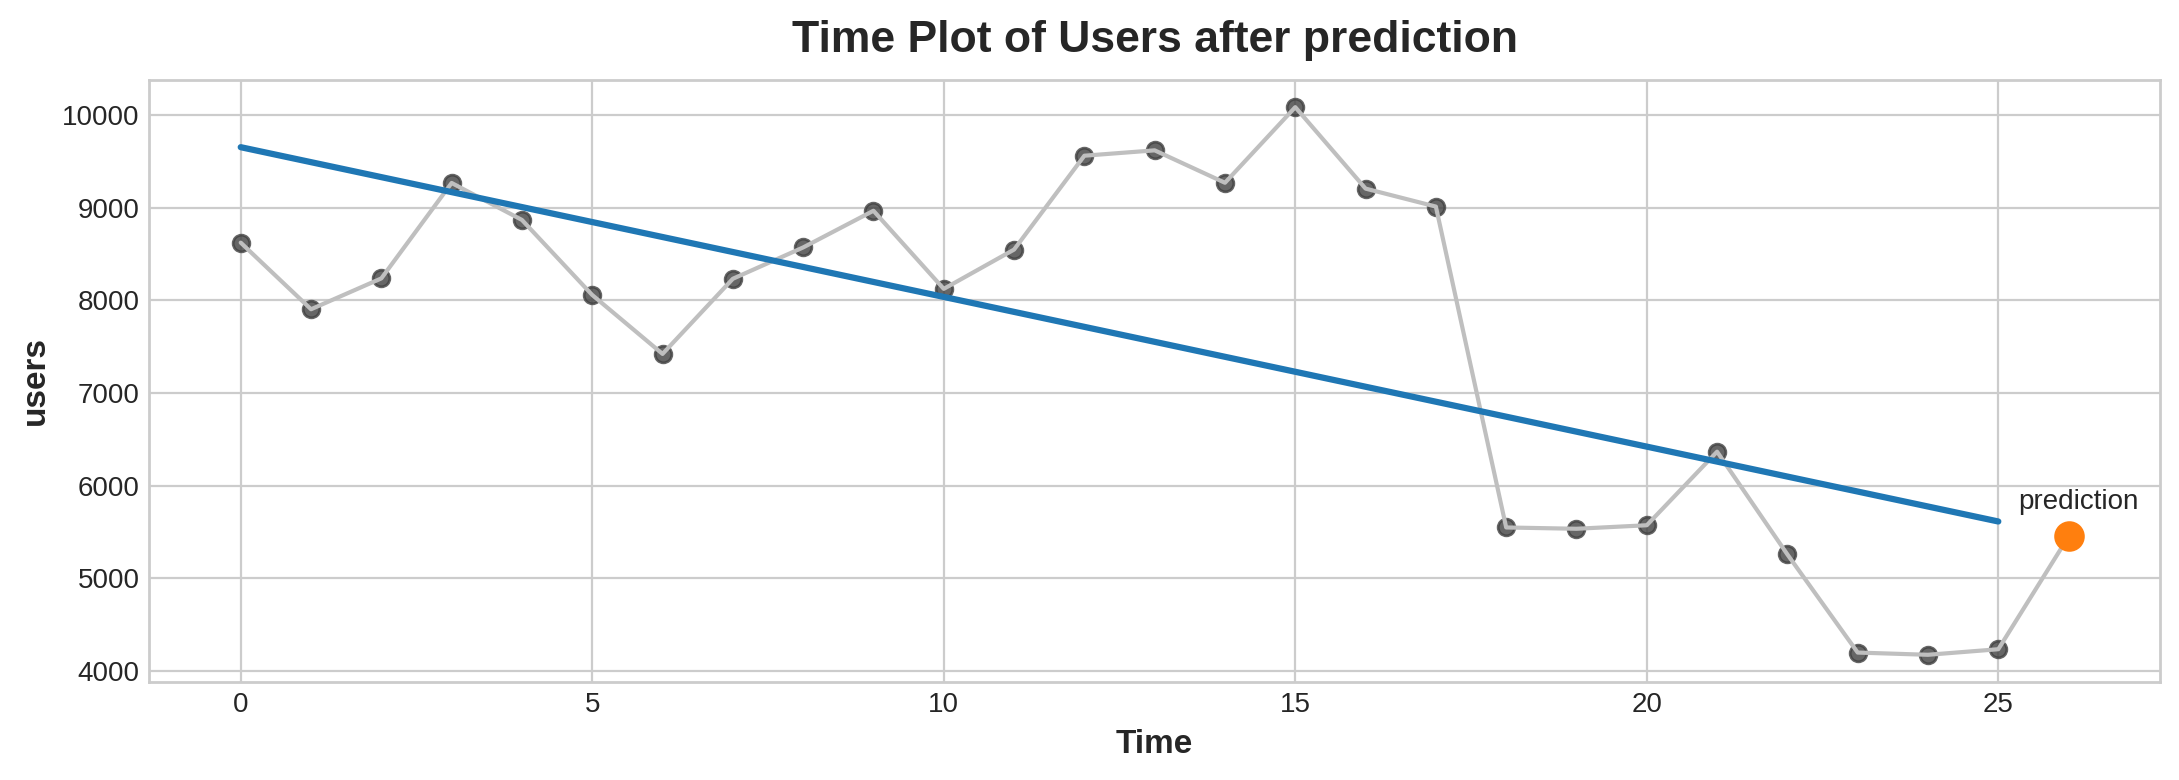

In [ ]:
df = pd.read_csv('regs.csv')
df['period'] = pd.to_datetime(df['period'])
df.set_index('period', inplace = True)
df['Time'] = np.arange(len(df.index))

# Plot of initial data
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'users', data=df, color='0.75')
ax = sns.regplot(x='Time', y='users', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Users before prediction');

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'users']  # target

# Train the model
model = LinearRegression()
dataFit = model.fit(X, y)

# Plot of data with prediction
new = pd.DataFrame({'Time': [26]})
newPredict = pd.DataFrame({'period': ['2022-08-01'], 'Time': [26], 'users': dataFit.predict(new)}).set_index('period')
dfPredict = df.append(newPredict)
dfPredict

fig, ax = plt.subplots()
ax.plot('Time', 'users', data=dfPredict, color='0.75')
ax = sns.regplot(x='Time', y='users', data=df, ci=None, scatter_kws=dict(color='0.25'))

ax.plot('Time', 'users', data=newPredict, marker='.', ls='none', ms=20)

ax.set_title('Time Plot of Users after prediction');
plt.text(newPredict.loc['2022-08-01']['Time'] + 1, newPredict.loc['2022-08-01']['users'] + 300, 'prediction', horizontalalignment='right')

In [ ]:
dfPredict.tail()

,users,Time
period,,
2022-04-01 00:00:00,5258.000000,22
2022-05-01 00:00:00,4199.000000,23
2022-06-01 00:00:00,4175.000000,24
2022-07-01 00:00:00,4235.000000,25
2022-08-01,5451.969231,26
